<a href="https://colab.research.google.com/github/Heleinef/Data-Science-Master_Heleine/blob/main/Week4_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  


# Week Four - Part 2 - Assignment High Frequency Words

**Team Members: Heleine, Gabriel, Kossi, Victor**


**The assignment:**

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

**Our Answers Below:**

# Selected corpus: Martin Luther King, Jr. ["I Have a Dream"](https://www.americanrhetoric.com/speeches/mlkihaveadream.htm) Speech.

# 1. Import libraries/Modules and load the speech

In [18]:

import requests
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np


# Load the speech text from the GitHub accountto python
url = "https://raw.githubusercontent.com/Heleinef/Data-Science-Master_Heleine/main/dream.txt"
response = requests.get(url)
speech_text = response.text




# 2. Preprocessing the data

In [11]:
# Check if the request was successful
if response.status_code == 200:
    text = response.text
else:
    print("Failed to fetch data from the URL")

# Preprocess the text
words = re.findall(r'\b\w+\b', text.lower())

# Get unique words
unique_words = set(words)
total_unique_words = len(unique_words)
print(f"Total unique words: {total_unique_words}")
print(f"Unique words: {list(unique_words)[:10]}")  # Print only the first 10 unique words for brevity


Total unique words: 467
Unique words: ['their', 'brothers', 'prosperity', 'ghetto', 'equality', 'whirlwinds', 'overlook', 'hands', 'jail', 'self']


# 3. Finding the Most Common Words

In [12]:
# Calculate word frequencies
word_counts = Counter(words)

# Sort words by frequency
sorted_word_counts = word_counts.most_common()

# Calculate the total number of words
total_words = sum(word_counts.values())

# Find the number of unique words that represent half of the total words
half_total_words = total_words / 2
cumulative_count = 0
unique_words_half = 0

for word, count in sorted_word_counts:
    cumulative_count += count
    unique_words_half += 1
    if cumulative_count >= half_total_words:
        break

print(f"Number of unique words that represent half of the total words: {unique_words_half}")


Number of unique words that represent half of the total words: 35


# 4. Identifying the 150 Highest Frequency Words

In [22]:
# Get the 150 highest frequency words
top_150_words = sorted_word_counts[:150]
print(f"Top 150 words: {top_150_words}")


Top 150 words: [('the', 85), ('of', 85), ('to', 53), ('and', 39), ('a', 36), ('be', 30), ('will', 26), ('we', 23), ('in', 22), ('that', 22), ('have', 18), ('this', 17), ('is', 17), ('as', 16), ('i', 15), ('freedom', 15), ('from', 14), ('with', 13), ('one', 13), ('colored', 12), ('nation', 11), ('every', 11), ('day', 11), ('let', 11), ('dream', 11), ('our', 10), ('not', 10), ('ring', 10), ('go', 9), ('s', 9), ('it', 8), ('back', 8), ('able', 8), ('today', 7), ('american', 7), ('come', 7), ('justice', 7), ('together', 7), ('you', 6), ('for', 6), ('america', 6), ('by', 6), ('all', 6), ('men', 6), ('are', 6), ('now', 6), ('satisfied', 6), ('down', 5), ('years', 5), ('great', 5), ('long', 5), ('their', 5), ('but', 5), ('free', 5), ('check', 5), ('when', 5), ('white', 5), ('time', 5), ('children', 5), ('faith', 5), ('shall', 5), ('hope', 4), ('hundred', 4), ('later', 4), ('still', 4), ('an', 4), ('his', 4), ('land', 4), ('black', 4), ('has', 4), ('its', 4), ('god', 4), ('until', 4), ('cannot

# 5. Creating a Graph of Relative Frequency

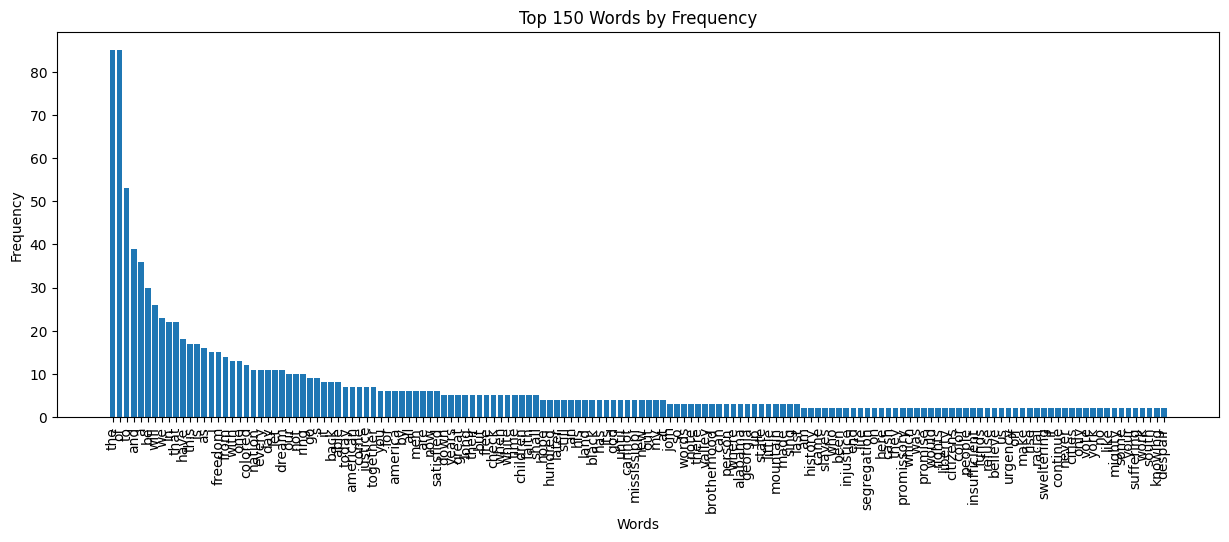

In [23]:
# Extract words and their counts for the top 150
top_150_words, top_150_counts = zip(*top_150_words)

# Plot the relative frequency
plt.figure(figsize=(15, 5))
plt.bar(top_150_words, top_150_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 150 Words by Frequency')
plt.xticks(rotation=90)
plt.show()


# 6. Zipf's Law
Zipf's law states that the frequency of any word is inversely proportional to its rank in the frequency table. To check if the observed relative frequency follows Zipf’s law, we can plot the word frequencies on a log-log scale.

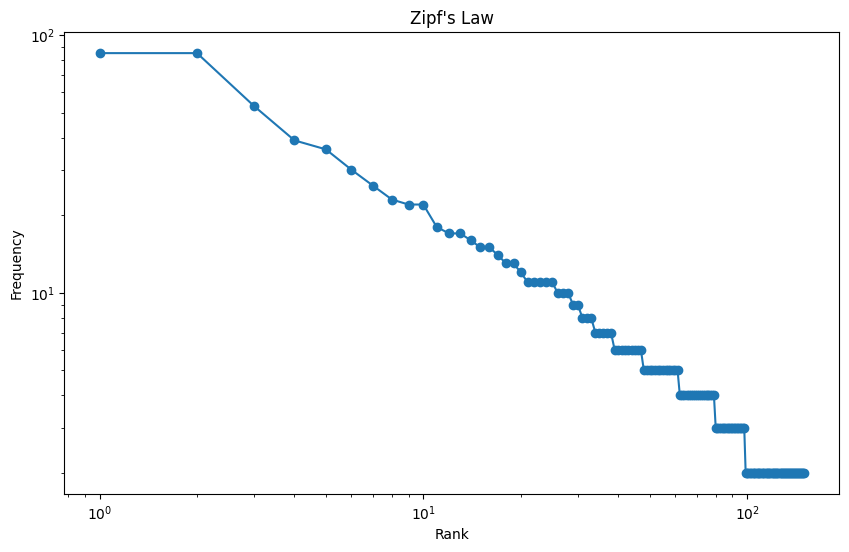

In [25]:
import numpy as np

# Rank the frequencies
ranks = np.arange(1, len(top_150_counts) + 1)
frequencies = np.array(top_150_counts)

# Plot on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker="o")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law")
plt.show()


# 7. Frequency Comparison

The frequency of words in Martin Luther King's "I Have a Dream" speech(which is our selected corpus) might differ from "all words in all corpora," due to several reasons linked to:

- **A specific context:** The corpus is a single speech by Martin Luther King, delivered at a specific time and place in American History. As a result, words related to civil rights, equality, and justice are likely more frequent here than in a general corpus.
- **Repetition:** Speeches often repeat key phrases and words for emphasis, leading to higher frequencies for certain words.
- **Proper Nouns and Specific Terms:**
 Given the historical realities of his time and Luther's own ambitions when writing his speech, the corpus may contain proper nouns and specific terms (such as "freedom," "justice") more frequently than in a general corpus.

 In contrast, in general corpora, function words (such as "the," "of," "and") are typically the most frequent. Additionally,
a general corpus includes a wide range of topics and vocabulary, leading to a more balanced distribution of word frequencies.